In [1]:
import warnings                        # To ignore any warnings
warnings.filterwarnings("ignore")
%matplotlib inline
%pylab inline
import os
import glob
import numpy as np
from tqdm import tqdm
import itertools
import matplotlib.pyplot as plt
import pandas as pd

# Audio
import librosa
import librosa.display

# Scikit learn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
from sklearn.utils import class_weight

# Keras
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.utils import to_categorical

import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

Populating the interactive namespace from numpy and matplotlib


Using TensorFlow backend.


In [2]:
import youtube_dl
import time
import random

rock=['https://www.youtube.com/watch?v=eVTXPUF4Oz4', 'https://www.youtube.com/watch?v=BB0DU4DoPP4', 'https://www.youtube.com/watch?v=kXYiU_JCYtU', 'https://www.youtube.com/watch?v=eVTXPUF4Oz4', 'https://www.youtube.com/watch?v=kXYiU_JCYtU', 'https://www.youtube.com/watch?v=ScNNfyq3d_w', 'https://www.youtube.com/watch?v=Gd9OhYroLN0', 'https://www.youtube.com/watch?v=YVkUvmDQ3HY', 'https://www.youtube.com/watch?v=gOMhN-hfMtY', 'https://www.youtube.com/watch?v=fV4DiAyExN0', 'https://www.youtube.com/watch?v=_sXrTpOVnak', 'https://www.youtube.com/watch?v=zsCD5XCu6CM', 'https://www.youtube.com/watch?v=tAGnKpE4NCI', 'https://www.youtube.com/watch?v=3YxaaGgTQYM', 'https://www.youtube.com/watch?v=hTWKbfoikeg', 'https://www.youtube.com/watch?v=v2H4l9RpkwM', 'https://www.youtube.com/watch?v=5anLPw0Efmo', 'https://www.youtube.com/watch?v=uelHwf8o7_U', 'https://www.youtube.com/watch?v=vjVkXlxsO8Q', 'https://www.youtube.com/watch?v=vx2u5uUu3DE', 'https://www.youtube.com/watch?v=8sgycukafqQ', 'https://www.youtube.com/watch?v=Soa3gO7tL-c', 'https://www.youtube.com/watch?v=UprcpdwuwCg', 'https://www.youtube.com/watch?v=yZIummTz9mM', 'https://www.youtube.com/watch?v=kXYiU_JCYtU', 'https://www.youtube.com/watch?v=eVTXPUF4Oz4', 'https://www.youtube.com/watch?v=3YxaaGgTQYM', 'https://www.youtube.com/watch?v=YlUKcNNmywk', 'https://www.youtube.com/watch?v=7QU1nvuxaMA', 'https://www.youtube.com/watch?v=fV4DiAyExN0', 'https://www.youtube.com/watch?v=kPBzTxZQG5Q', 'https://www.youtube.com/watch?v=yKNxeF4KMsY', 'https://www.youtube.com/watch?v=1cQh1ccqu8M', 'https://www.youtube.com/watch?v=8sgycukafqQ', 'https://www.youtube.com/watch?v=Soa3gO7tL-c', 'https://www.youtube.com/watch?v=SBjQ9tuuTJQ', 'https://www.youtube.com/watch?v=HyHNuVaZJ-k', 'https://www.youtube.com/watch?v=iAP9AF6DCu4', 'https://www.youtube.com/watch?v=k4V3Mo61fJM', 'https://www.youtube.com/watch?v=gGdGFtwCNBE', 'https://www.youtube.com/watch?v=98Akpf1ph2o', 'https://www.youtube.com/watch?v=RF0HhrwIwp0', 'https://www.youtube.com/watch?v=RvnkAtWcKYg', 'https://www.youtube.com/watch?v=vc6vs-l5dkc', 'https://www.youtube.com/watch?v=0J2QdDbelmY', 'https://www.youtube.com/watch?v=xPU8OAjjS4k', 'https://www.youtube.com/watch?v=r00ikilDxW4', 'https://www.youtube.com/watch?v=d8ekz_CSBVg', 'https://www.youtube.com/watch?v=Oextk-If8HQ', 'https://www.youtube.com/watch?v=s1tAYmMjLdY', 'https://www.youtube.com/watch?v=9Ht5RZpzPqw', 'https://www.youtube.com/watch?v=Sb5aq5HcS1A', 'https://www.youtube.com/watch?v=hPC2Fp7IT7o', 'https://www.youtube.com/watch?v=GemKqzILV4w', 'https://www.youtube.com/watch?v=v2H4l9RpkwM', 'https://www.youtube.com/watch?v=8DyziWtkfBw', 'https://www.youtube.com/watch?v=8mGBaXPlri8', 'https://www.youtube.com/watch?v=RiSfTyrvJlg', 'https://www.youtube.com/watch?v=gnIZ7RMuLpU', 'https://www.youtube.com/watch?v=cjVQ36NhbMk', 'https://www.youtube.com/watch?v=lL2ZwXj1tXM', 'https://www.youtube.com/watch?v=CDl9ZMfj6aE', 'https://www.youtube.com/watch?v=BB0DU4DoPP4', 'https://www.youtube.com/watch?v=s8QYxmpuyxg', 'https://www.youtube.com/watch?v=h_L4Rixya64', 'https://www.youtube.com/watch?v=0k_1kvDh2UA', 'https://www.youtube.com/watch?v=Zx4Hjq6KwO0', 'https://www.youtube.com/watch?v=TIy3n2b7V9k', 'https://www.youtube.com/watch?v=FC3y9llDXuM', 'https://www.youtube.com/watch?v=WC5FdFlUcl0', 'https://www.youtube.com/watch?v=Y5fBdpreJiU', 'https://www.youtube.com/watch?v=RRKJiM9Njr8', 'https://www.youtube.com/watch?v=emGri7i8Y2Y', 'https://www.youtube.com/watch?v=NU9JoFKlaZ0', 'https://www.youtube.com/watch?v=O-fyNgHdmLI', 'https://www.youtube.com/watch?v=8yvGCAvOAfM', 'https://www.youtube.com/watch?v=b8-tXG8KrWs', 'https://www.youtube.com/watch?v=Ud4HuAzHEUc', 'https://www.youtube.com/watch?v=vVy9Lgpg1m8', 'https://www.youtube.com/watch?v=xqds0B_meys', 'https://www.youtube.com/watch?v=ac3HkriqdGQ', 'https://www.youtube.com/watch?v=JnfyjwChuNU', 'https://www.youtube.com/watch?v=onzL0EM1pKY', 'https://www.youtube.com/watch?v=Dn8vzTsnPps', 'https://www.youtube.com/watch?v=co6WMzDOh1o', 'https://www.youtube.com/watch?v=pT68FS3YbQ4', 'https://www.youtube.com/watch?v=MmZexg8sxyk', 'https://www.youtube.com/watch?v=RUi54JTgL5s', 'https://www.youtube.com/watch?v=Pgum6OT_VH8', 'https://www.youtube.com/watch?v=araU0fZj6oQ', 'https://www.youtube.com/watch?v=fgT9zGkiLig', 'https://www.youtube.com/watch?v=ff0oWESdmH0', 'https://www.youtube.com/watch?v=ma9I9VBKPiw', 'https://www.youtube.com/watch?v=8IEQpfA528M', 'https://www.youtube.com/watch?v=kcASPx3-HuI', 'https://www.youtube.com/watch?v=s88r_q7oufE', 'https://www.youtube.com/watch?v=vVXIK1xCRpY', 'https://www.youtube.com/watch?v=tuK6n2Lkza0', 'https://www.youtube.com/watch?v=CMX2lPum_pg', 'https://www.youtube.com/watch?v=eHbNU9WuVgw', 'https://www.youtube.com/watch?v=j7CDb610Bg0', 'https://www.youtube.com/watch?v=TOypSnKFHrE', 'https://www.youtube.com/watch?v=CTAud5O7Qqk', 'https://www.youtube.com/watch?v=0fcRa5Z6LmU', 'https://www.youtube.com/watch?v=6Ux6SlOE9Qk', 'https://www.youtube.com/watch?v=luM6oeCM7Yw', 'https://www.youtube.com/watch?v=hN5X4kGhAtU', 'https://www.youtube.com/watch?v=UQ92eyxnxmQ', 'https://www.youtube.com/watch?v=3dm_5qWWDV8', 'https://www.youtube.com/watch?v=qv96yJYhk3M', 'https://www.youtube.com/watch?v=xJJsoquu70o', 'https://www.youtube.com/watch?v=7gwO8-oqwFw', 'https://www.youtube.com/watch?v=qO-mSLxih-c', 'https://www.youtube.com/watch?v=5YXVMCHG-Nk', 'https://www.youtube.com/watch?v=oKsxPW6i3pM', 'https://www.youtube.com/watch?v=jkaMiaRLgvY', 'https://www.youtube.com/watch?v=Ijk4j-r7qPA', 'https://www.youtube.com/watch?v=Pib8eYDSFEI', 'https://www.youtube.com/watch?v=oIIxlgcuQRU', 'https://www.youtube.com/watch?v=desJKYvdq9A']
jazz=['https://www.youtube.com/watch?v=vmDDOFXSgAs', 'https://www.youtube.com/watch?v=N3xeX3MqJew', 'https://www.youtube.com/watch?v=RPfFhfSuUZ4', 'https://www.youtube.com/watch?v=ESHfzQqahr8', 'https://www.youtube.com/watch?v=qWG2dsXV5HI', 'https://www.youtube.com/watch?v=RPfFhfSuUZ4', 'https://www.youtube.com/watch?v=qWG2dsXV5HI', 'https://www.youtube.com/watch?v=_sI_Ps7JSEk', 'https://www.youtube.com/watch?v=UayFuEbHxrs', 'https://www.youtube.com/watch?v=Nu4tjTyqbho', 'https://www.youtube.com/watch?v=tT9Eh8wNMkw', 'https://www.youtube.com/watch?v=CpB7-8SGlJ0', 'https://www.youtube.com/watch?v=neV3EPgvZ3g', 'https://www.youtube.com/watch?v=aq0m0hbCjFQ', 'https://www.youtube.com/watch?v=zqNTltOGh5c', 'https://www.youtube.com/watch?v=lR7icNffxXE', 'https://www.youtube.com/watch?v=2VN8zH366M8', 'https://www.youtube.com/watch?v=k3_tw44QsZQ', 'https://www.youtube.com/watch?v=CdnaJPPxQow', 'https://www.youtube.com/watch?v=-488UORrfJ0', 'https://www.youtube.com/watch?v=rqpriUFsMQQ', 'https://www.youtube.com/watch?v=fsJ3JjpZyoA', 'https://www.youtube.com/watch?v=QfZruW3NI6c', 'https://www.youtube.com/watch?v=RPfFhfSuUZ4', 'https://www.youtube.com/watch?v=vmDDOFXSgAs', 'https://www.youtube.com/watch?v=ZrfzenYhv9w', 'https://www.youtube.com/watch?v=CWeXOm49kE0', 'https://www.youtube.com/watch?v=qJi03NqXfk8', 'https://www.youtube.com/watch?v=qWG2dsXV5HI', 'https://www.youtube.com/watch?v=WqEweV0eScg', 'https://www.youtube.com/watch?v=TDETNk20Vkc', 'https://www.youtube.com/watch?v=xISaCzXYYg8', 'https://www.youtube.com/watch?v=N76ErzOdk9g', 'https://www.youtube.com/watch?v=Cx-TxiBi43c', 'https://www.youtube.com/watch?v=zGsGwFBoEgc', 'https://www.youtube.com/watch?v=HmroWIcCNUI', 'https://www.youtube.com/watch?v=ujChUYkPvec', 'https://www.youtube.com/watch?v=h6NCx0wcrC4', 'https://www.youtube.com/watch?v=ECw3WAX41OA', 'https://www.youtube.com/watch?v=I777BcgQL9o', 'https://www.youtube.com/watch?v=yXK0pZx92MU', 'https://www.youtube.com/watch?v=jUN01HYwRX4', 'https://www.youtube.com/watch?v=KsAf0ra6Vd4', 'https://www.youtube.com/watch?v=-488UORrfJ0', 'https://www.youtube.com/watch?v=CTzRHq_cH5E', 'https://www.youtube.com/watch?v=mP0flneNfaQ', 'https://www.youtube.com/watch?v=6tBJa8Ew6fQ', 'https://www.youtube.com/watch?v=u23Etcb-L9M', 'https://www.youtube.com/watch?v=YjRbmtrDJI4', 'https://www.youtube.com/watch?v=0rjP5MPA3qs', 'https://www.youtube.com/watch?v=fvJzCdgB3Tc', 'https://www.youtube.com/watch?v=1OKduoWWWsE', 'https://www.youtube.com/watch?v=36wafFjFdYs', 'https://www.youtube.com/watch?v=M69YdmAJoLs', 'https://www.youtube.com/watch?v=9ohyLzAu_qM', 'https://www.youtube.com/watch?v=47vdxkLj4nU', 'https://www.youtube.com/watch?v=qlIbs0mZYSA', 'https://www.youtube.com/watch?v=AL5G6QnW-ek', 'https://www.youtube.com/watch?v=_40V2lcxM7k', 'https://www.youtube.com/watch?v=RJEjFh2FOzA', 'https://www.youtube.com/watch?v=2vOWMz1z7rk', 'https://www.youtube.com/watch?v=c-69SscIpC8', 'https://www.youtube.com/watch?v=OYo6G8RBjAE', 'https://www.youtube.com/watch?v=dEOjjeYEiRs', 'https://www.youtube.com/watch?v=L97XaO61d7k', 'https://www.youtube.com/watch?v=a1WDW-swiAA', 'https://www.youtube.com/watch?v=8TdY6iqV2k0', 'https://www.youtube.com/watch?v=IrVnm66joQk', 'https://www.youtube.com/watch?v=fvRkGglLe-U', 'https://www.youtube.com/watch?v=UA2XIWZxMKM', 'https://www.youtube.com/watch?v=s4rXEKtC8iY', 'https://www.youtube.com/watch?v=tLfdtNoDD_A', 'https://www.youtube.com/watch?v=CsHtO_i4qzM', 'https://www.youtube.com/watch?v=5m2HN2y0yV8', 'https://www.youtube.com/watch?v=fuqW-wUZ8V4', 'https://www.youtube.com/watch?v=6WjW5orDM2c', 'https://www.youtube.com/watch?v=YjRWditGKRY', 'https://www.youtube.com/watch?v=jsFST-7Hx-Y', 'https://www.youtube.com/watch?v=eNWDwOsQqlw', 'https://www.youtube.com/watch?v=K9q4LRyhufo', 'https://www.youtube.com/watch?v=W985hWD5KYg', 'https://www.youtube.com/watch?v=0Q7J4PgrRsY', 'https://www.youtube.com/watch?v=dH3GSrCmzC8', 'https://www.youtube.com/watch?v=kOO8Gzr__zc', 'https://www.youtube.com/watch?v=q1z2BdvHVCk', 'https://www.youtube.com/watch?v=KV0HX9sk_04', 'https://www.youtube.com/watch?v=_3vpiTgG59A', 'https://www.youtube.com/watch?v=K_h1geOaLvY', 'https://www.youtube.com/watch?v=u37RF5xKNq8', 'https://www.youtube.com/watch?v=KAlVasHbipo', 'https://www.youtube.com/watch?v=2FaMtXw2mRE', 'https://www.youtube.com/watch?v=Bm1NxfevGro', 'https://www.youtube.com/watch?v=w3TMe98FJDw', 'https://www.youtube.com/watch?v=II_LtoZGSVg', 'https://www.youtube.com/watch?v=or5qBh8Xbpc', 'https://www.youtube.com/watch?v=wA1ZelIbUfI', 'https://www.youtube.com/watch?v=u2xx3YTu2ac', 'https://www.youtube.com/watch?v=lBbGRxSiYBs', 'https://www.youtube.com/watch?v=f60JYoHdfVM', 'https://www.youtube.com/watch?v=Lo18F5ObPng', 'https://www.youtube.com/watch?v=qagOblqhBhk', 'https://www.youtube.com/watch?v=gwaFDFP7m_E', 'https://www.youtube.com/watch?v=wwO5TZdNWok', 'https://www.youtube.com/watch?v=RcOIUECTPtU', 'https://www.youtube.com/watch?v=0yQyjcpnx3g', 'https://www.youtube.com/watch?v=x8UcxgE21kM', 'https://www.youtube.com/watch?v=fhCinGFUCeU', 'https://www.youtube.com/watch?v=hbreWwFKQNg', 'https://www.youtube.com/watch?v=hLUyVyM626A', 'https://www.youtube.com/watch?v=zre0u5XyNfY', 'https://www.youtube.com/watch?v=k0FJ1SdS-ts', 'https://www.youtube.com/watch?v=fKb0Sc2lYVU', 'https://www.youtube.com/watch?v=x8cFdZyWOOs', 'https://www.youtube.com/watch?v=BO_Lfk-8P5c', 'https://www.youtube.com/watch?v=ADPgTmca6Zs', 'https://www.youtube.com/watch?v=hkyJQcmVtZQ', 'https://www.youtube.com/watch?v=BqLDTKun4so', 'https://www.youtube.com/watch?v=Oi4G6UmYK9U']
mkdNarod = ['https://www.youtube.com/watch?v=Eoc28fdIDUc', 'https://www.youtube.com/watch?v=jAHKy_rExWM', 'https://www.youtube.com/watch?v=Eoc28fdIDUc', 'https://www.youtube.com/watch?v=jAHKy_rExWM', 'https://www.youtube.com/watch?v=E81QE4YKkbI', 'https://www.youtube.com/watch?v=3LBWGjH6DoA', 'https://www.youtube.com/watch?v=BiPImCSa-b4', 'https://www.youtube.com/watch?v=ULUtzFe2wac', 'https://www.youtube.com/watch?v=UIgOUSyXMxs', 'https://www.youtube.com/watch?v=lUwRxN59djU', 'https://www.youtube.com/watch?v=jCQksO68C0I', 'https://www.youtube.com/watch?v=2YqW5i5KhqU', 'https://www.youtube.com/watch?v=uWyiXYeQMnY', 'https://www.youtube.com/watch?v=bHc2Nc72Mk0', 'https://www.youtube.com/watch?v=_JdL07p6TO0', 'https://www.youtube.com/watch?v=T6xQrD8-CeI', 'https://www.youtube.com/watch?v=Ubs4E_9gzTA', 'https://www.youtube.com/watch?v=15s-0zoUkvw', 'https://www.youtube.com/watch?v=Z3z5S4ndpk4', 'https://www.youtube.com/watch?v=73PCUU2UZQ0', 'https://www.youtube.com/watch?v=A923enCmm2U', 'https://www.youtube.com/watch?v=Y9xCuSkT8zE', 'https://www.youtube.com/watch?v=fSkza4WYPjk', 'https://www.youtube.com/watch?v=jAHKy_rExWM', 'https://www.youtube.com/watch?v=Eoc28fdIDUc', 'https://www.youtube.com/watch?v=vLwWMddrl4Q', 'https://www.youtube.com/watch?v=fSkza4WYPjk', 'https://www.youtube.com/watch?v=jCQksO68C0I', 'https://www.youtube.com/watch?v=Gpslq0tuoNQ', 'https://www.youtube.com/watch?v=yKRd7VNwwJQ', 'https://www.youtube.com/watch?v=fVzoXXm3FNQ', 'https://www.youtube.com/watch?v=yA5qcn26gRU', 'https://www.youtube.com/watch?v=UnTt-A7OY9g', 'https://www.youtube.com/watch?v=mkDYTIyES00', 'https://www.youtube.com/watch?v=A923enCmm2U', 'https://www.youtube.com/watch?v=ilJlBtVSnZM', 'https://www.youtube.com/watch?v=fMMoM3zagBY', 'https://www.youtube.com/watch?v=oxP8GOn5wdc', 'https://www.youtube.com/watch?v=MdNs_LUKFBg', 'https://www.youtube.com/watch?v=N_bXsIqXkoQ', 'https://www.youtube.com/watch?v=FLPXHfZY9Ws', 'https://www.youtube.com/watch?v=wEugrifPjSI', 'https://www.youtube.com/watch?v=73PCUU2UZQ0', 'https://www.youtube.com/watch?v=F_xS7QRmzlc', 'https://www.youtube.com/watch?v=okAn6n1QRCI', 'https://www.youtube.com/watch?v=Jiz0zpL2ed8', 'https://www.youtube.com/watch?v=Thfym1XecHo', 'https://www.youtube.com/watch?v=A8ea8L8L6CM', 'https://www.youtube.com/watch?v=fY1gDjVETIc', 'https://www.youtube.com/watch?v=bHc2Nc72Mk0', 'https://www.youtube.com/watch?v=Pg2mhunskgI', 'https://www.youtube.com/watch?v=T6xQrD8-CeI', 'https://www.youtube.com/watch?v=lUwRxN59djU', 'https://www.youtube.com/watch?v=cpOsm2GwXMo', 'https://www.youtube.com/watch?v=gWC14eXoNHA', 'https://www.youtube.com/watch?v=Iz9Ax7C45aI', 'https://www.youtube.com/watch?v=3ljmk3MqaNA', 'https://www.youtube.com/watch?v=EbveB0-l0DE', 'https://www.youtube.com/watch?v=SlZoJlNABF8', 'https://www.youtube.com/watch?v=tdeUKcDYVhU', 'https://www.youtube.com/watch?v=xkBWm25s8FU', 'https://www.youtube.com/watch?v=-X0JmORka3M', 'https://www.youtube.com/watch?v=ci_oFkL-KhA', 'https://www.youtube.com/watch?v=AYKilAodOPg', 'https://www.youtube.com/watch?v=2YqW5i5KhqU', 'https://www.youtube.com/watch?v=jAHKy_rExWM', 'https://www.youtube.com/watch?v=Eoc28fdIDUc', 'https://www.youtube.com/watch?v=2YqW5i5KhqU', 'https://www.youtube.com/watch?v=Eoc28fdIDUc', 'https://www.youtube.com/watch?v=oxP8GOn5wdc', 'https://www.youtube.com/watch?v=jAHKy_rExWM', 'https://www.youtube.com/watch?v=Eoc28fdIDUc', 'https://www.youtube.com/watch?v=E81QE4YKkbI', 'https://www.youtube.com/watch?v=3LBWGjH6DoA', 'https://www.youtube.com/watch?v=BiPImCSa-b4', 'https://www.youtube.com/watch?v=ULUtzFe2wac', 'https://www.youtube.com/watch?v=UIgOUSyXMxs', 'https://www.youtube.com/watch?v=lUwRxN59djU', 'https://www.youtube.com/watch?v=jCQksO68C0I', 'https://www.youtube.com/watch?v=2YqW5i5KhqU', 'https://www.youtube.com/watch?v=uWyiXYeQMnY', 'https://www.youtube.com/watch?v=bHc2Nc72Mk0', 'https://www.youtube.com/watch?v=_JdL07p6TO0', 'https://www.youtube.com/watch?v=jAHKy_rExWM']

for i in range (0,120):
    try:
        time.sleep(random.randint(10, 15))
        video_url=mkdNarod[i]
        video_info = youtube_dl.YoutubeDL().extract_info(
                url=video_url, download=False
            )
        filename = f"D:/Songs/narodni/{video_info['title']}.mp3"
        options = {
            'format': 'bestaudio/best',
            'keepvideo': False,
            'outtmpl': filename,
            'postprocessors': [{
                'key': 'FFmpegExtractAudio',
                'preferredcodec': 'mp3',
                'preferredquality': '192',
            }]
        }
        with youtube_dl.YoutubeDL(options) as ydl:
            ydl.download([video_info['webpage_url']])
    except:
        print("nemozhe ovaa",i)

[youtube] Eoc28fdIDUc: Downloading webpage
[youtube] Eoc28fdIDUc: Downloading webpage
[download] Destination: D:\Songs\narodni\Ja Izlezi Stara Majko - Macedonian Song.mp3
[download] 100% of 2.28MiB in 00:01                  
[ffmpeg] Post-process file D:\Songs\narodni\Ja Izlezi Stara Majko - Macedonian Song.mp3 exists, skipping
[youtube] jAHKy_rExWM: Downloading webpage
[youtube] jAHKy_rExWM: Downloading webpage
[download] Destination: D:\Songs\narodni\Stani Mome Da Zaigras - Macedonian Song.mp3
[download] 100% of 2.39MiB in 00:01                  
[ffmpeg] Post-process file D:\Songs\narodni\Stani Mome Da Zaigras - Macedonian Song.mp3 exists, skipping
[youtube] Eoc28fdIDUc: Downloading webpage
[youtube] Eoc28fdIDUc: Downloading webpage
[download] D:\Songs\narodni\Ja Izlezi Stara Majko - Macedonian Song.mp3 has already been downloaded
[download] 100% of 2.28MiB
[ffmpeg] Post-process file D:\Songs\narodni\Ja Izlezi Stara Majko - Macedonian Song.mp3 exists, skipping
[youtube] jAHKy_rExWM:

ERROR: This video contains content from Unit Media Music, who has blocked it on copyright grounds.


nemozhe ovaa 28
[youtube] yKRd7VNwwJQ: Downloading webpage
[youtube] yKRd7VNwwJQ: Downloading webpage
[download] Destination: D:\Songs\narodni\Kazi Rajne, Kazi Duso - Macedonian Song.mp3
[download] 100% of 3.12MiB in 00:04                  
[ffmpeg] Post-process file D:\Songs\narodni\Kazi Rajne, Kazi Duso - Macedonian Song.mp3 exists, skipping
[youtube] fVzoXXm3FNQ: Downloading webpage
[youtube] fVzoXXm3FNQ: Downloading webpage
[download] Destination: D:\Songs\narodni\Snosti Minav Pokraj Vazi - Macedonian Song.mp3
[download] 100% of 3.59MiB in 00:06                  
[ffmpeg] Correcting container in "D:\Songs\narodni\Snosti Minav Pokraj Vazi - Macedonian Song.mp3"
[ffmpeg] Post-process file D:\Songs\narodni\Snosti Minav Pokraj Vazi - Macedonian Song.mp3 exists, skipping
[youtube] yA5qcn26gRU: Downloading webpage
[youtube] yA5qcn26gRU: Downloading embed webpage
[youtube] yA5qcn26gRU: Refetching age-gated info webpage


ERROR: This video contains content from Unit Media Music, who has blocked it on copyright grounds.


nemozhe ovaa 31
[youtube] UnTt-A7OY9g: Downloading webpage
[youtube] UnTt-A7OY9g: Downloading webpage
[download] Destination: D:\Songs\narodni\Vo Strumica Na Ulica - Macedonian Song.mp3
[download] 100% of 3.40MiB in 00:01                  
[ffmpeg] Post-process file D:\Songs\narodni\Vo Strumica Na Ulica - Macedonian Song.mp3 exists, skipping
[youtube] mkDYTIyES00: Downloading webpage
[youtube] mkDYTIyES00: Downloading embed webpage
[youtube] mkDYTIyES00: Refetching age-gated info webpage


ERROR: This video contains content from Unit Media Music, who has blocked it on copyright grounds.


nemozhe ovaa 33
[youtube] A923enCmm2U: Downloading webpage
[youtube] A923enCmm2U: Downloading webpage
[download] D:\Songs\narodni\Ajde Slusaj, Slusaj Kales Bre Angjo - Macedonian Song.mp3 has already been downloaded
[download] 100% of 4.65MiB
[ffmpeg] Post-process file D:\Songs\narodni\Ajde Slusaj, Slusaj Kales Bre Angjo - Macedonian Song.mp3 exists, skipping
[youtube] ilJlBtVSnZM: Downloading webpage
[youtube] ilJlBtVSnZM: Downloading webpage
[download] Destination: D:\Songs\narodni\More Sokol Pie - Macedonian Song.mp3
[download] 100% of 3.58MiB in 00:02                  
[ffmpeg] Post-process file D:\Songs\narodni\More Sokol Pie - Macedonian Song.mp3 exists, skipping
[youtube] fMMoM3zagBY: Downloading webpage
[youtube] fMMoM3zagBY: Downloading webpage
[download] Destination: D:\Songs\narodni\Ne Kazuvaj Libe Dobra Nok - Macedonian Song.mp3
[download] 100% of 3.46MiB in 00:02                  
[ffmpeg] Post-process file D:\Songs\narodni\Ne Kazuvaj Libe Dobra Nok - Macedonian Song.mp3 e

ERROR: F_xS7QRmzlc: YouTube said: Unable to extract video data


nemozhe ovaa 43
[youtube] okAn6n1QRCI: Downloading webpage
[youtube] okAn6n1QRCI: Downloading webpage
[download] Destination: D:\Songs\narodni\Kirjana Vino Prodava - Macedonian Song.mp3
[download] 100% of 3.35MiB in 00:01                  
[ffmpeg] Post-process file D:\Songs\narodni\Kirjana Vino Prodava - Macedonian Song.mp3 exists, skipping
[youtube] Jiz0zpL2ed8: Downloading webpage
[youtube] Jiz0zpL2ed8: Downloading webpage
[download] Destination: D:\Songs\narodni\Belo Lice Ljubam Jas - Macedonian Song.mp3
[download] 100% of 3.87MiB in 00:01                  
[ffmpeg] Post-process file D:\Songs\narodni\Belo Lice Ljubam Jas - Macedonian Song.mp3 exists, skipping
[youtube] Thfym1XecHo: Downloading webpage
[youtube] Thfym1XecHo: Downloading webpage
[download] Destination: D:\Songs\narodni\Ako Umram il Zaginam - Macedonian Song.mp3
[download] 100% of 2.79MiB in 00:01                  
[ffmpeg] Post-process file D:\Songs\narodni\Ako Umram il Zaginam - Macedonian Song.mp3 exists, skipping


ERROR: This video contains content from Unit Media Music, who has blocked it on copyright grounds.


nemozhe ovaa 61
[youtube] ci_oFkL-KhA: Downloading webpage
[youtube] ci_oFkL-KhA: Downloading embed webpage
[youtube] ci_oFkL-KhA: Refetching age-gated info webpage


ERROR: This video contains content from Unit Media Music, who has blocked it on copyright grounds.


nemozhe ovaa 62
[youtube] AYKilAodOPg: Downloading webpage
[youtube] AYKilAodOPg: Downloading webpage
[download] Destination: D:\Songs\narodni\Tuginata Pusta Da Ostane - Macedonian Song.mp3
[download] 100% of 2.71MiB in 00:11                  
[ffmpeg] Post-process file D:\Songs\narodni\Tuginata Pusta Da Ostane - Macedonian Song.mp3 exists, skipping
[youtube] 2YqW5i5KhqU: Downloading webpage
[youtube] 2YqW5i5KhqU: Downloading webpage
[download] D:\Songs\narodni\Kako Sto E Taa Casa - Macedonian Song.mp3 has already been downloaded
[download] 100% of 2.94MiB
[ffmpeg] Post-process file D:\Songs\narodni\Kako Sto E Taa Casa - Macedonian Song.mp3 exists, skipping
[youtube] jAHKy_rExWM: Downloading webpage
[youtube] jAHKy_rExWM: Downloading webpage
[download] D:\Songs\narodni\Stani Mome Da Zaigras - Macedonian Song.mp3 has already been downloaded
[download] 100% of 2.39MiB
[ffmpeg] Post-process file D:\Songs\narodni\Stani Mome Da Zaigras - Macedonian Song.mp3 exists, skipping
[youtube] Eoc28f

In [8]:
import os
i = 0
for file in os.listdir("D:/Songs/rock"):
    i=i+1
    namef = f"D:/Songs/rock/rock_{file}"
    filefile = "D:/Songs/rock/" + file
    os.rename(filefile, namef)


In [2]:
INPUT_DIR="D:/Songs/allsongs/**"
# 16 KHz
SAMPLE_RATE = 16000
# seconds
MAX_SOUND_CLIP_DURATION=150000

## Preprocessing


In [16]:
dataset = []
for filename in glob.iglob(INPUT_DIR):
    if os.path.exists(filename):
        label = os.path.basename(filename).split("_")[0]
        duration = librosa.get_duration(filename=filename)
        print('label',label,'duration',duration)
        # skip audio smaller than 3 secs
        if duration>=65 and duration <=600:
            slice_size = 5
            iterations = int((duration-slice_size)/(slice_size-1))
            iterations += 1
          
            initial_offset = (duration - ((iterations*(slice_size-1))+1))/2
            print ('pesnata: ',filename,'initial_offset: ',initial_offset,'iterations: ',iterations,'duration: ',duration)
            for i in range(iterations):
                offset = initial_offset + i*(slice_size-1)
                if (label == "jazz"):
                    dataset.append({
                        "filename": filename,
                        "label": "jazz",
                        "offset": offset
                        })
                elif (label=="rock"):
                    dataset.append({
                        "filename": filename,
                        "label": "rock",
                        "offset": offset
                        })
                else:
                    dataset.append({
                        "filename": filename,
                        "label": "narodni",
                        "offset": offset
                        })
                        
dataset = pd.DataFrame(dataset)
dataset = shuffle(dataset, random_state=42)
dataset.info()

label jazz duration 188.5
pesnata:  D:/Songs/allsongs\jazz_#Cast Your Fate to the Wind# Vince Guaraldi Trio.mp3 initial_offset:  1.75 iterations:  46 duration:  188.5
label jazz duration 518.8
pesnata:  D:/Songs/allsongs\jazz_#Comin' Home Baby#  Herbie Mann.mp3 initial_offset:  0.8999999999999773 iterations:  129 duration:  518.8
label jazz duration 119.0
pesnata:  D:/Songs/allsongs\jazz_#Groove# Holmes - #Misty#.mp3 initial_offset:  1.0 iterations:  29 duration:  119.0
label jazz duration 917.7
label jazz duration 189.8
pesnata:  D:/Songs/allsongs\jazz_'Round Midnight - Thelonious Monk (1947).mp3 initial_offset:  0.4000000000000057 iterations:  47 duration:  189.8
label jazz duration 4044.4
label jazz duration 372.4
pesnata:  D:/Songs/allsongs\jazz_Art Blakey & the Jazz Messengers - Along Came Betty.mp3 initial_offset:  1.6999999999999886 iterations:  92 duration:  372.4
label jazz duration 575.2
pesnata:  D:/Songs/allsongs\jazz_Art Blakey & the Jazz Messengers - Moanin'.mp3 initial_o

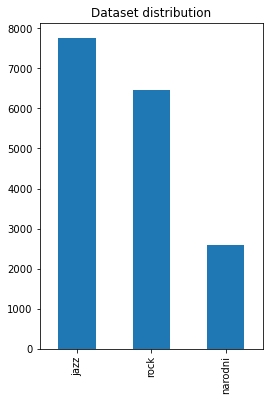

In [17]:
plt.figure(figsize=(4,6))
dataset.label.value_counts().plot(kind='bar', title="Dataset distribution")
plt.show()

In [18]:
train, test = train_test_split(dataset, test_size=0.2, random_state=42)

print("Train: %i" % len(train))
print("Test: %i" % len(test))

Train: 13448
Test: 3362


D:/Songs/allsongs\jazz_Horace Silver - Song for My Father.mp3
D:/Songs/allsongs\rock_Audioslave - Like a Stone (Official Video).mp3
D:/Songs/allsongs\narodni_33.mp3


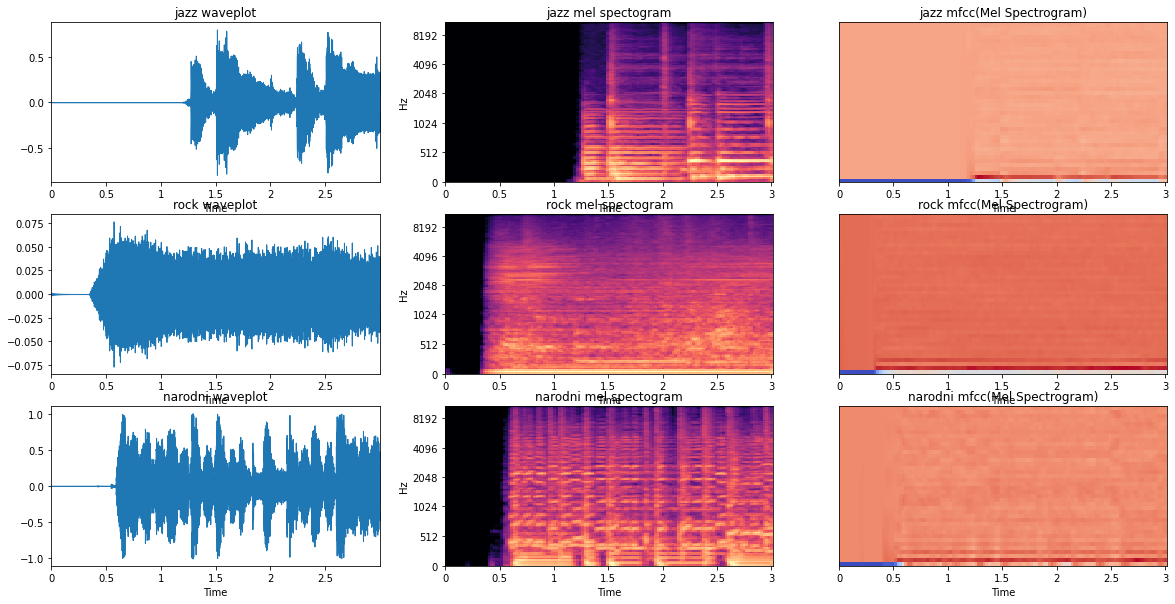

In [19]:
plt.figure(figsize=(20,10))
idx = 0
for label in dataset.label.unique():    
    y, sr = librosa.load(dataset[dataset.label==label].filename.iloc[33], duration=3)
    print(dataset[dataset.label==label].filename.iloc[33])
    
    # Wave plot
    idx+=1
    plt.subplot(3, 3, idx)
    plt.title("%s waveplot" % label)
    librosa.display.waveplot(y, sr=sr)

    # Mel Spectrogram
    idx+=1
    plt.subplot(3, 3, idx)
    S = librosa.feature.melspectrogram(y, sr=sr, n_fft=2048, hop_length=512, n_mels=128)
    S_DB = librosa.power_to_db(S, ref=np.max)
    librosa.display.specshow(S_DB, sr=sr, hop_length=512, x_axis='time', y_axis='mel')
    plt.title("%s mel spectogram" % label)

    # MFCC (Mel spectrogram)
    idx+=1
    mfccs = librosa.feature.mfcc(S=librosa.power_to_db(S), n_mfcc=40)
    plt.subplot(3, 3, idx)
    librosa.display.specshow(mfccs, x_axis='time')
    plt.title("%s mfcc(Mel Spectrogram)" % label)
plt.show()

In [21]:
def extract_features(audio_path,offset):

    y, sr = librosa.load(audio_path, offset=offset, duration=5)

    
    S = librosa.feature.melspectrogram(y, sr=sr, n_fft=2048, 
                                   hop_length=512, 
                                   n_mels=128)
    mfccs = librosa.feature.mfcc(S=librosa.power_to_db(S), n_mfcc=40)


    return mfccs

In [22]:
x_train = []
x_test = []

for idx in tqdm(range(len(train))):
    x_train.append(extract_features(train.filename.iloc[idx],train.offset.iloc[idx]))

for idx in tqdm(range(len(test))):
    x_test.append(extract_features(test.filename.iloc[idx],test.offset.iloc[idx]))
    
x_test = np.asarray(x_test)
x_train = np.asarray(x_train)

print("X train:", x_train.shape)
print("X test:", x_test.shape)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3362/3362 [1:41:07<00:00,  1.80s/it]


X train: (13448, 40, 216)
X test: (3362, 40, 216)


In [28]:
encoder = LabelEncoder()
encoder.fit(train.label)

y_train = encoder.transform(train.label)
y_test = encoder.transform(test.label)

# Compute class weights
class_weights = class_weight.compute_class_weight('balanced',np.unique(y_train),y_train)

x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print("X train:", x_train.shape)
print("Y train:", y_train.shape)
print("X test:", x_test.shape)
print("Y test:", y_test.shape)

model = Sequential()
model.add(Conv2D(filters=16, kernel_size=2, input_shape=(x_train.shape[1],x_train.shape[2],x_train.shape[3]), activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv2D(filters=32, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv2D(filters=64, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv2D(filters=128, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.5))
model.add(GlobalAveragePooling2D())

model.add(Dense(len(encoder.classes_), activation='softmax'))
model.summary()

#Compile
adam = keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

X train: (13448, 40, 216, 1)
Y train: (13448, 3)
X test: (3362, 40, 216, 1)
Y test: (3362, 3)
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 39, 215, 16)       80        
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 19, 107, 16)       0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 19, 107, 16)       0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 18, 106, 32)       2080      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 9, 53, 32)         0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 9, 53, 32)         0         
__________________________

In [29]:
%%time
history = model.fit(x_train, y_train,
              batch_size=128,
              epochs=85,
              validation_data=(x_test, y_test),
              class_weight=class_weights,
              shuffle=True)



Train on 13448 samples, validate on 3362 samples
Epoch 1/85
13448/13448 [==============================] - 87s 6ms/step - loss: 1.1235 - accuracy: 0.6579 - val_loss: 0.5783 - val_accuracy: 0.7939
Epoch 2/85
13448/13448 [==============================] - 84s 6ms/step - loss: 0.5195 - accuracy: 0.8076 - val_loss: 0.4664 - val_accuracy: 0.8385
Epoch 3/85
13448/13448 [==============================] - 84s 6ms/step - loss: 0.4350 - accuracy: 0.8371 - val_loss: 0.4610 - val_accuracy: 0.8611
Epoch 4/85
13448/13448 [==============================] - 85s 6ms/step - loss: 0.3778 - accuracy: 0.8600 - val_loss: 0.3758 - val_accuracy: 0.8882
Epoch 5/85
13448/13448 [==============================] - 84s 6ms/step - loss: 0.3359 - accuracy: 0.8764 - val_loss: 0.3140 - val_accuracy: 0.8944
Epoch 6/85
13448/13448 [==============================] - 93s 7ms/step - loss: 0.3047 - accuracy: 0.8844 - val_loss: 0.3623 - val_accuracy: 0.8703
Epoch 7/85
13448/13448 [==============================] - 86s 6ms/ste

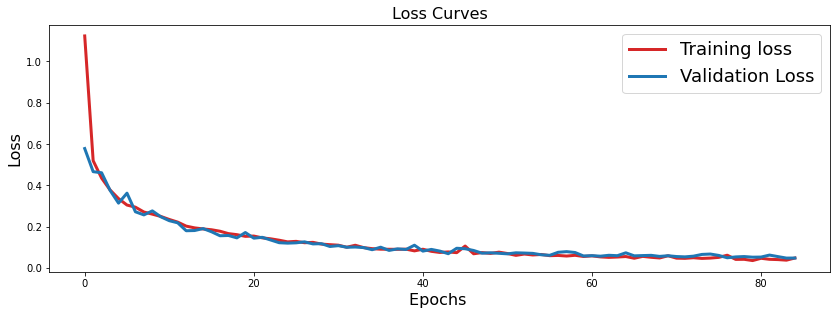

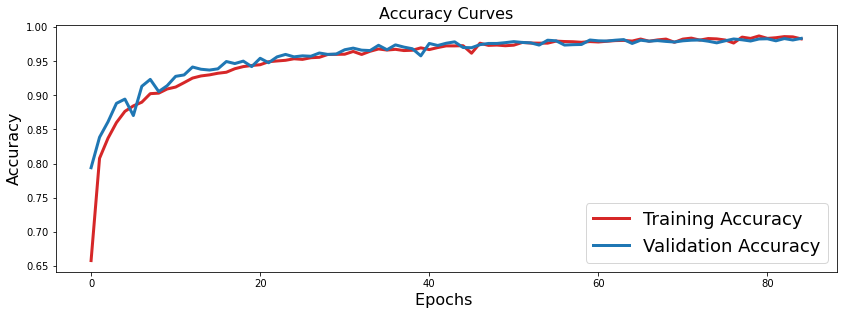

In [30]:
# Loss Curves
plt.figure(figsize=[14,10])
plt.subplot(211)
plt.plot(history.history['loss'],'#d62728',linewidth=3.0)
plt.plot(history.history['val_loss'],'#1f77b4',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
 
# Accuracy Curves
plt.figure(figsize=[14,10])
plt.subplot(212)
plt.plot(history.history['accuracy'],'#d62728',linewidth=3.0)
plt.plot(history.history['val_accuracy'],'#1f77b4',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

model_name = "genre_classifier(test_98%).h5"
model.save(model_name)

In [31]:
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

3362/3362 [==============================] - 8s 2ms/step
Test loss: 0.048163641140569646
Test accuracy: 0.983343243598938


In [32]:
predictions = model.predict(x_test, verbose=1)

y_true, y_pred = [],[]
classes = encoder.classes_
for idx, prediction in enumerate(predictions): 
    y_true.append(classes[np.argmax(y_test[idx])])
    y_pred.append(classes[np.argmax(prediction)])
    
print(classification_report(y_pred, y_true))

3362/3362 [==============================] - 7s 2ms/step
              precision    recall  f1-score   support

        jazz       0.99      0.98      0.99      1547
     narodni       0.98      0.99      0.98       516
        rock       0.98      0.98      0.98      1299

    accuracy                           0.98      3362
   macro avg       0.98      0.98      0.98      3362
weighted avg       0.98      0.98      0.98      3362



# Classify new song

In [40]:
from keras.models import load_model
 

#model = load_model("genre_classifier(test_98%).h5")

#File to be classified
classify_file = "D:/Songs/rock/rock_Nickelback - Photograph.mp3"
x_test = []
x_test.append(extract_features(classify_file,0.5))
x_test = np.asarray(x_test)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)

pred = model.predict(x_test,verbose=1)

print(pred)
pred_class = model.predict_classes(x_test)

print(pred_class[0])
if pred_class[0]==0:
    print("jazz")
    print("confidence of prediction:",pred[0][0])
elif (pred_class[0]==1):
    print("narodni")
    print("confidence of prediction:",pred[0][1])
else:
    print("rock")
    print("confidence of prediction:",pred[0][2])

print('jazz %: ', pred[0][0], ' narodni %:' ,pred[0][1],'rock', pred[0][2])


1/1 [==============================] - 0s 42ms/step
[[0.00644802 0.00205055 0.99150145]]
2
rock
confidence of prediction: 0.99150145
jazz %:  0.006448015  narodni %: 0.0020505511 rock 0.99150145
